## Pytorch workflow
Resources:

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

https://www.learnpytorch.io/01_pytorch_workflow/

ask at discussion page

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
import torch
from torch import nn ##all building blocks for NN
import matplotlib.pyplot as plt

## Data (preparing and loading)

There are 2 parts in ML:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

In [ ]:
#Example of linear regression according to the formula Y = ax+b
# Create *known* parameters
weight = 0.7 #b
bias = 0.3 #a

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

Splitting into test and training sets

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to visualize the data

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots of training/test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are therepredictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data) if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

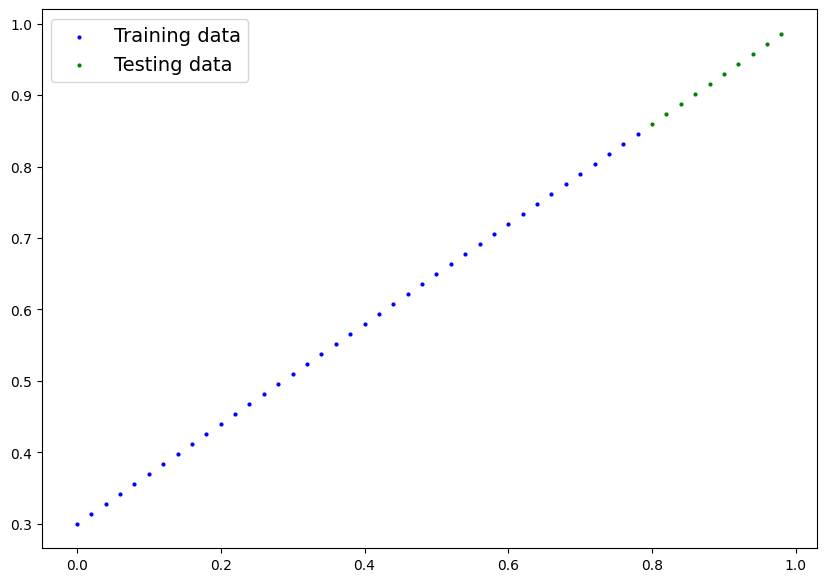

In [ ]:
plot_predictions()

Build a model (linear regression)

about classes:
https://realpython.com/python3-object-oriented-programming/

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

What our model does:

-start with random values (weight and bias)

-look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it so?

1. Gradient descent https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [ ]:
#model class
#with self. we create parameters
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- here by default)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward method defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### Pytorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph).
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
* torch.optim	- this where the optomizers in pytorch live, they will help with gradient descent.
* def forward()	- All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.


https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our Pytorch model
Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters #random
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Should put random values as close as possible to ideal values

In [ ]:
weight, bias #ideal

(0.7, 0.3)

### Making prediction using torch.inference_mode()
https://twitter.com/PyTorch/status/1437838231505096708


To check our model's predictive power, let's see how well it predicts y_test based on X_test

When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
# Make predictions with model
with torch.inference_mode(): #turns off gradient tracking
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

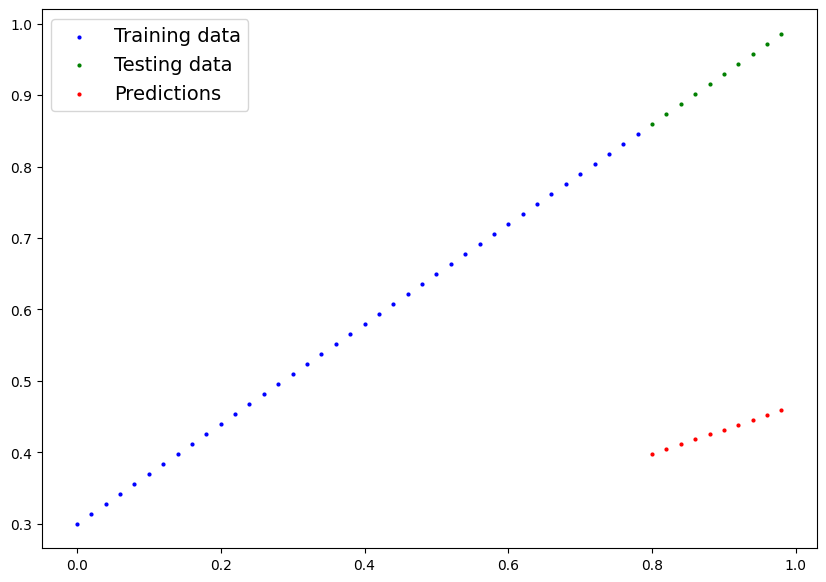

In [ ]:
plot_predictions(predictions=y_preds)

## Train model
The whole idea of training is for a model to move from some "unknown" parameters (these may be random) to some "known" parameters.

Or in other words from a poor representation of the data to a better representation of the data.
One way to measure how poor or how wrong your model predictions are is to use a loss function.
* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as loss function.

Things we need to train:
* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve a loss function.

And specifically for Pytorch we need:
* A train loop
* A testing loop




https://pytorch.org/docs/stable/nn.html#loss-functions

https://pytorch.org/docs/stable/optim.html

And we'll use SGD, torch.optim.SGD(params, lr) where:

**params** is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

**lr** - learning rate - hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes).

In [ ]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Create the optimizer (there are a lot of algorithms, here used stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate - possibly the most important hyperparameter we can set (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

For a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer torch.optim.SGD() will suffice.
But for classification problem like classiying images we should use a loss function of nn.BCELoss() (binary cross entropy loss)

### Building a training loop (and a testing loop)
A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (backpropagation)
5. Optimizer step - use the optimizer to adjust our's model parameters to try and improve loss (gradient descent)




In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer
    optimizer.step() # by default how the changes will accumulate through the loop so...wehave to zero them above in step 3 for the next iteration of the loop

    ### Testing

    # Put the model in evaluation mode
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (batch norm layers/dropout)

    with torch.inference_mode():    #turns off gradient tracking and a couple of things behind the scenes
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ")

      #Print out model state_dict()
      print(model_0.state_dict())

Epoch: 0 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262 
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])
OrderedDict([('weights', tensor([0.5834])), ('bias', tensor([0.3488]))])
OrderedDict([('weights', tensor([0.5852])), ('bias', tensor([0.3483]))])
OrderedDict([('weights', tensor([0.5868])), ('bias', tensor([0.3473]))])
OrderedDict([('weights', tensor([0.5886])), ('bias', tensor([0.3468]))])
OrderedDict([('weights', tensor([0.5902])), ('bias', tensor([0.3458]))])
OrderedDict([('weights', tensor([0.5920])), ('bias', tensor([0.3453]))])
OrderedDict([('weights', tensor([0.5938])), ('bias', tensor([0.3448]))])
OrderedDict([('weights', tensor([0.5954])), ('bias', tensor([0.3438]))])
Epoch: 10 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466 
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
OrderedDict([('weights', tensor([0.5988])), ('bias',

<function matplotlib.pyplot.legend(*args, **kwargs)>

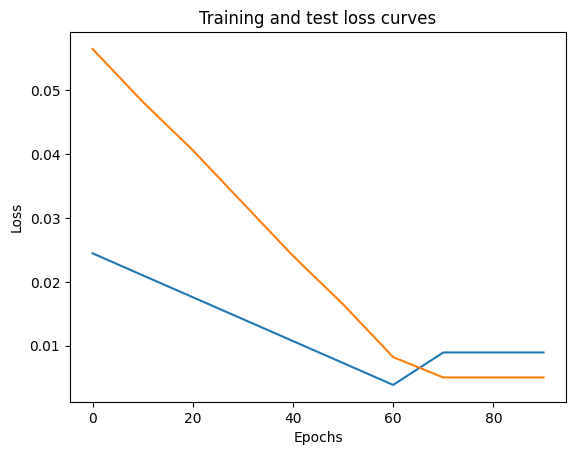

In [ ]:
#Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend

### Saving a model in Pytorch
3 methods:
1. 'torch.save()' - allows to save a Pytorch object in Python's pickle format
2. 'torch.load()' - allows to load a saved Pytorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Saving our pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading a model
Should create a new instance for state dictionary

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>